# Iris Flower Classification - Machine Learning

### About the Data Source
* The Iris flower data set, or Fisher's Iris data set, is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper on the use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

* His contribution to statistics goes far beyond Fisher's exact test. For example, he developed maximum likelihood estimation and the analysis of variance (more commonly known by its acronym ANOVA) test. For these important contributions, he is highly regarded in the history of modern statistics.

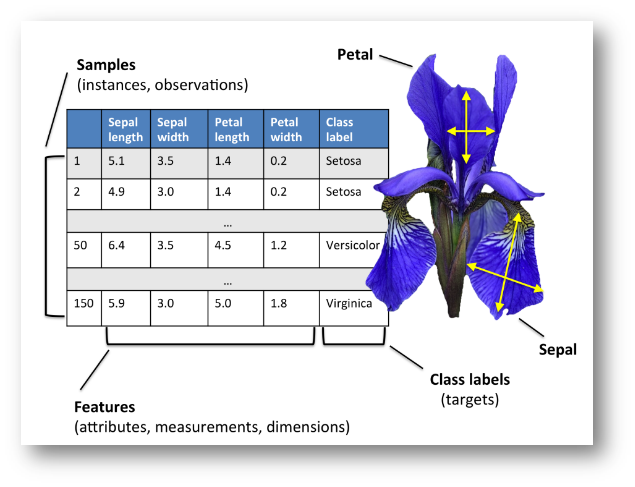

Source: https://medium.com/@Nivitus./iris-flower-classification-machine-learning-d4e337140fa4

### Classification Algorithm in Machine Learning
* Classification is the process of recognizing, understanding, and grouping ideas and objects into preset categories or “sub-populations.” 

* Using pre-categorized training datasets, machine learning programs use a variety of algorithms to classify future datasets into categories. 

* Classification algorithms in machine learning use input training data to predict the likelihood that subsequent data will fall into one of the predetermined categories. 

* One of the most common uses of classification is filtering emails into “spam” or “non-spam.”

* In short, classification is a form of “pattern recognition,” with classification algorithms applied to the training data to find the same pattern (similar words or sentiments, number sequences, etc.) in future sets of data.

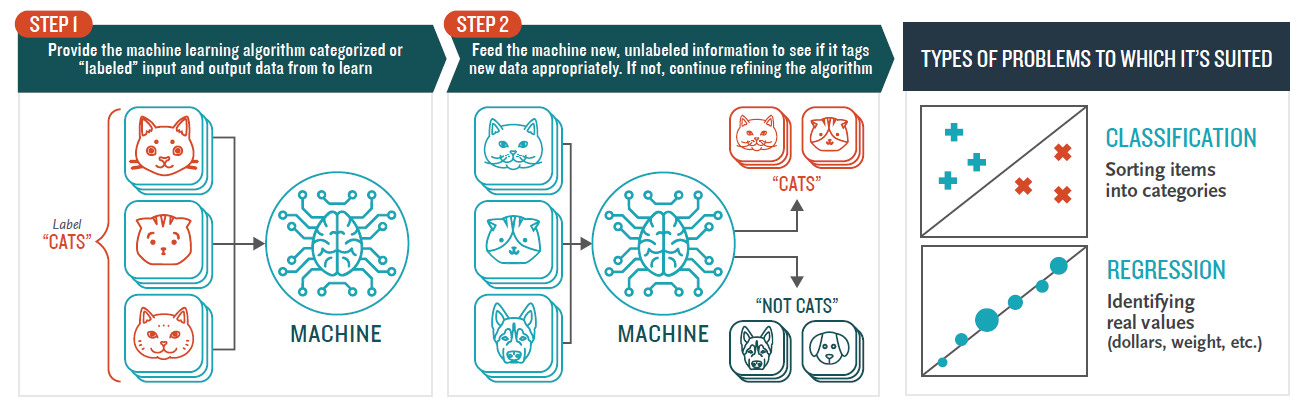

Source: https://www.edureka.co/blog/classification-in-machine-learning/

Source: https://www.faepa.br/kgyo.aspx?cname=machine+learning+for+idiots&cid=66

In [1]:
# Import the required libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### **Step 1 — Data Loading**

In [2]:
# Download data
df = pd.read_csv('Iris.csv')

In [3]:
# Dataset array dimension
df.shape

(150, 6)

In [6]:
# Basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# The first five rows of the data set
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# The last five rows of the data set
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


* The list has 6 columns and 150 rows. The 2nd, 3rd, 4th and 5th columns are the dimensions of each element of the perianth in centimeters. The last column contains information about the species.

* For further analysis we will not use column 1 (row numbering).

In [11]:
# Removal of the 'Id' column
df = df.drop('Id', axis = True)

#### **Step 2 — Data Review**

In [12]:
# Table of records with gaps
df[df.isnull().any(axis = True)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [13]:
# Summary of number of records by species
df_part = df.groupby('Species').count()
df_part.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50
